In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle


### Importing the dataset

In [7]:
train_data=pd.read_excel("Data_Train.xlsx")

In [8]:
pd.set_option("display.max_columns",None)

In [9]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Checking for null values in the dataset

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

 From the above we can infer that there is only one missing values in the route and total_stops. Hence we can go ahead and drop the records with missing values

In [12]:
train_data=train_data.dropna()

In [13]:
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 15m      1
47h 40m      1
42h 45m      1
29h 10m      1
28h 30m      1
Name: Duration, Length: 368, dtype: int64

### Exploratory Data Analysis

In [14]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [15]:
train_data["Day_of_Journey"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Month_of_Journey"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month


In [16]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [17]:
train_data=train_data.drop("Date_of_Journey",axis=1)

In [18]:
### Converting the Departure time to a datetime format
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [19]:
train_data=train_data.drop("Dep_Time",axis=1)

In [20]:
train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [21]:
### Convert the Arrival time to the datetime format
train_data["Arr_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arr_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [22]:
train_data=train_data.drop("Arrival_Time",axis=1)

In [23]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


Time taken by the plane to reach its destination is called duration.In otherwords, it's just the difference between the arrival and the departure time 

In [24]:
train_data["Duration"].head(1)

0    2h 50m
Name: Duration, dtype: object

In [25]:
duration= list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]="0h "+duration[i].strip()
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [26]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [27]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [28]:
train_data=train_data.drop("Duration",axis=1)

In [29]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


### Handling Categorical variables

In [30]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

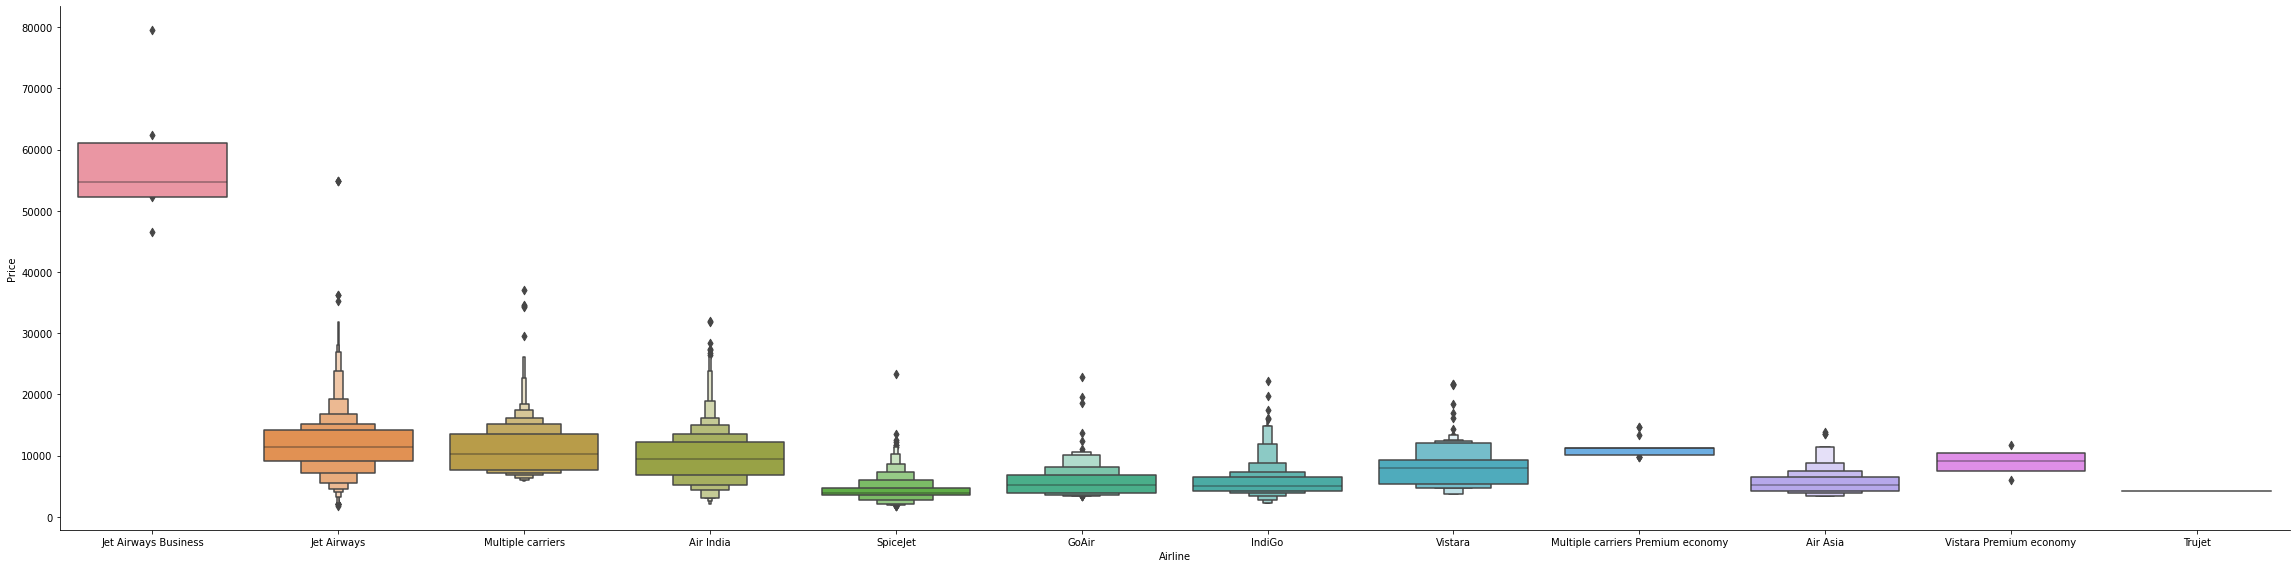

In [31]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=8,aspect=4)
plt.show()

In [32]:
Airline=pd.get_dummies(train_data[["Airline"]],drop_first=True)

In [33]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
## Checking the categorical variable source 
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [35]:
source=pd.get_dummies(train_data[["Source"]],drop_first=True)

In [36]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
destination=pd.get_dummies(train_data[["Destination"]],drop_first=True)

In [38]:
destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [39]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [40]:
## Dealing with Total Stops
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

For this column we have to perform mapping 

In [41]:
train_data["Total_Stops"]=train_data["Total_Stops"].map({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4})

In [42]:
train_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0


In [43]:
train_data=pd.concat([train_data,Airline,source,destination],axis=1)

In [44]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [46]:
train_data.head(1)

,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Test set

In [47]:
test_data = pd.read_excel(r"Test_set.xlsx")

In [48]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
##Day of Journey

test_data["Journey_day"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)


In [50]:
## Dep Time
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop("Dep_Time",axis=1,inplace=True)

In [51]:
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_min"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop("Arrival_Time",axis=1,inplace=True)

In [52]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [53]:
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)
Source = pd.get_dummies(test_data["Source"], drop_first= True)
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

## Feature Engineering

In [54]:

train_data.columns

Index(['Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [55]:
X = train_data.loc[:, ['Total_Stops', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [56]:
y = train_data["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

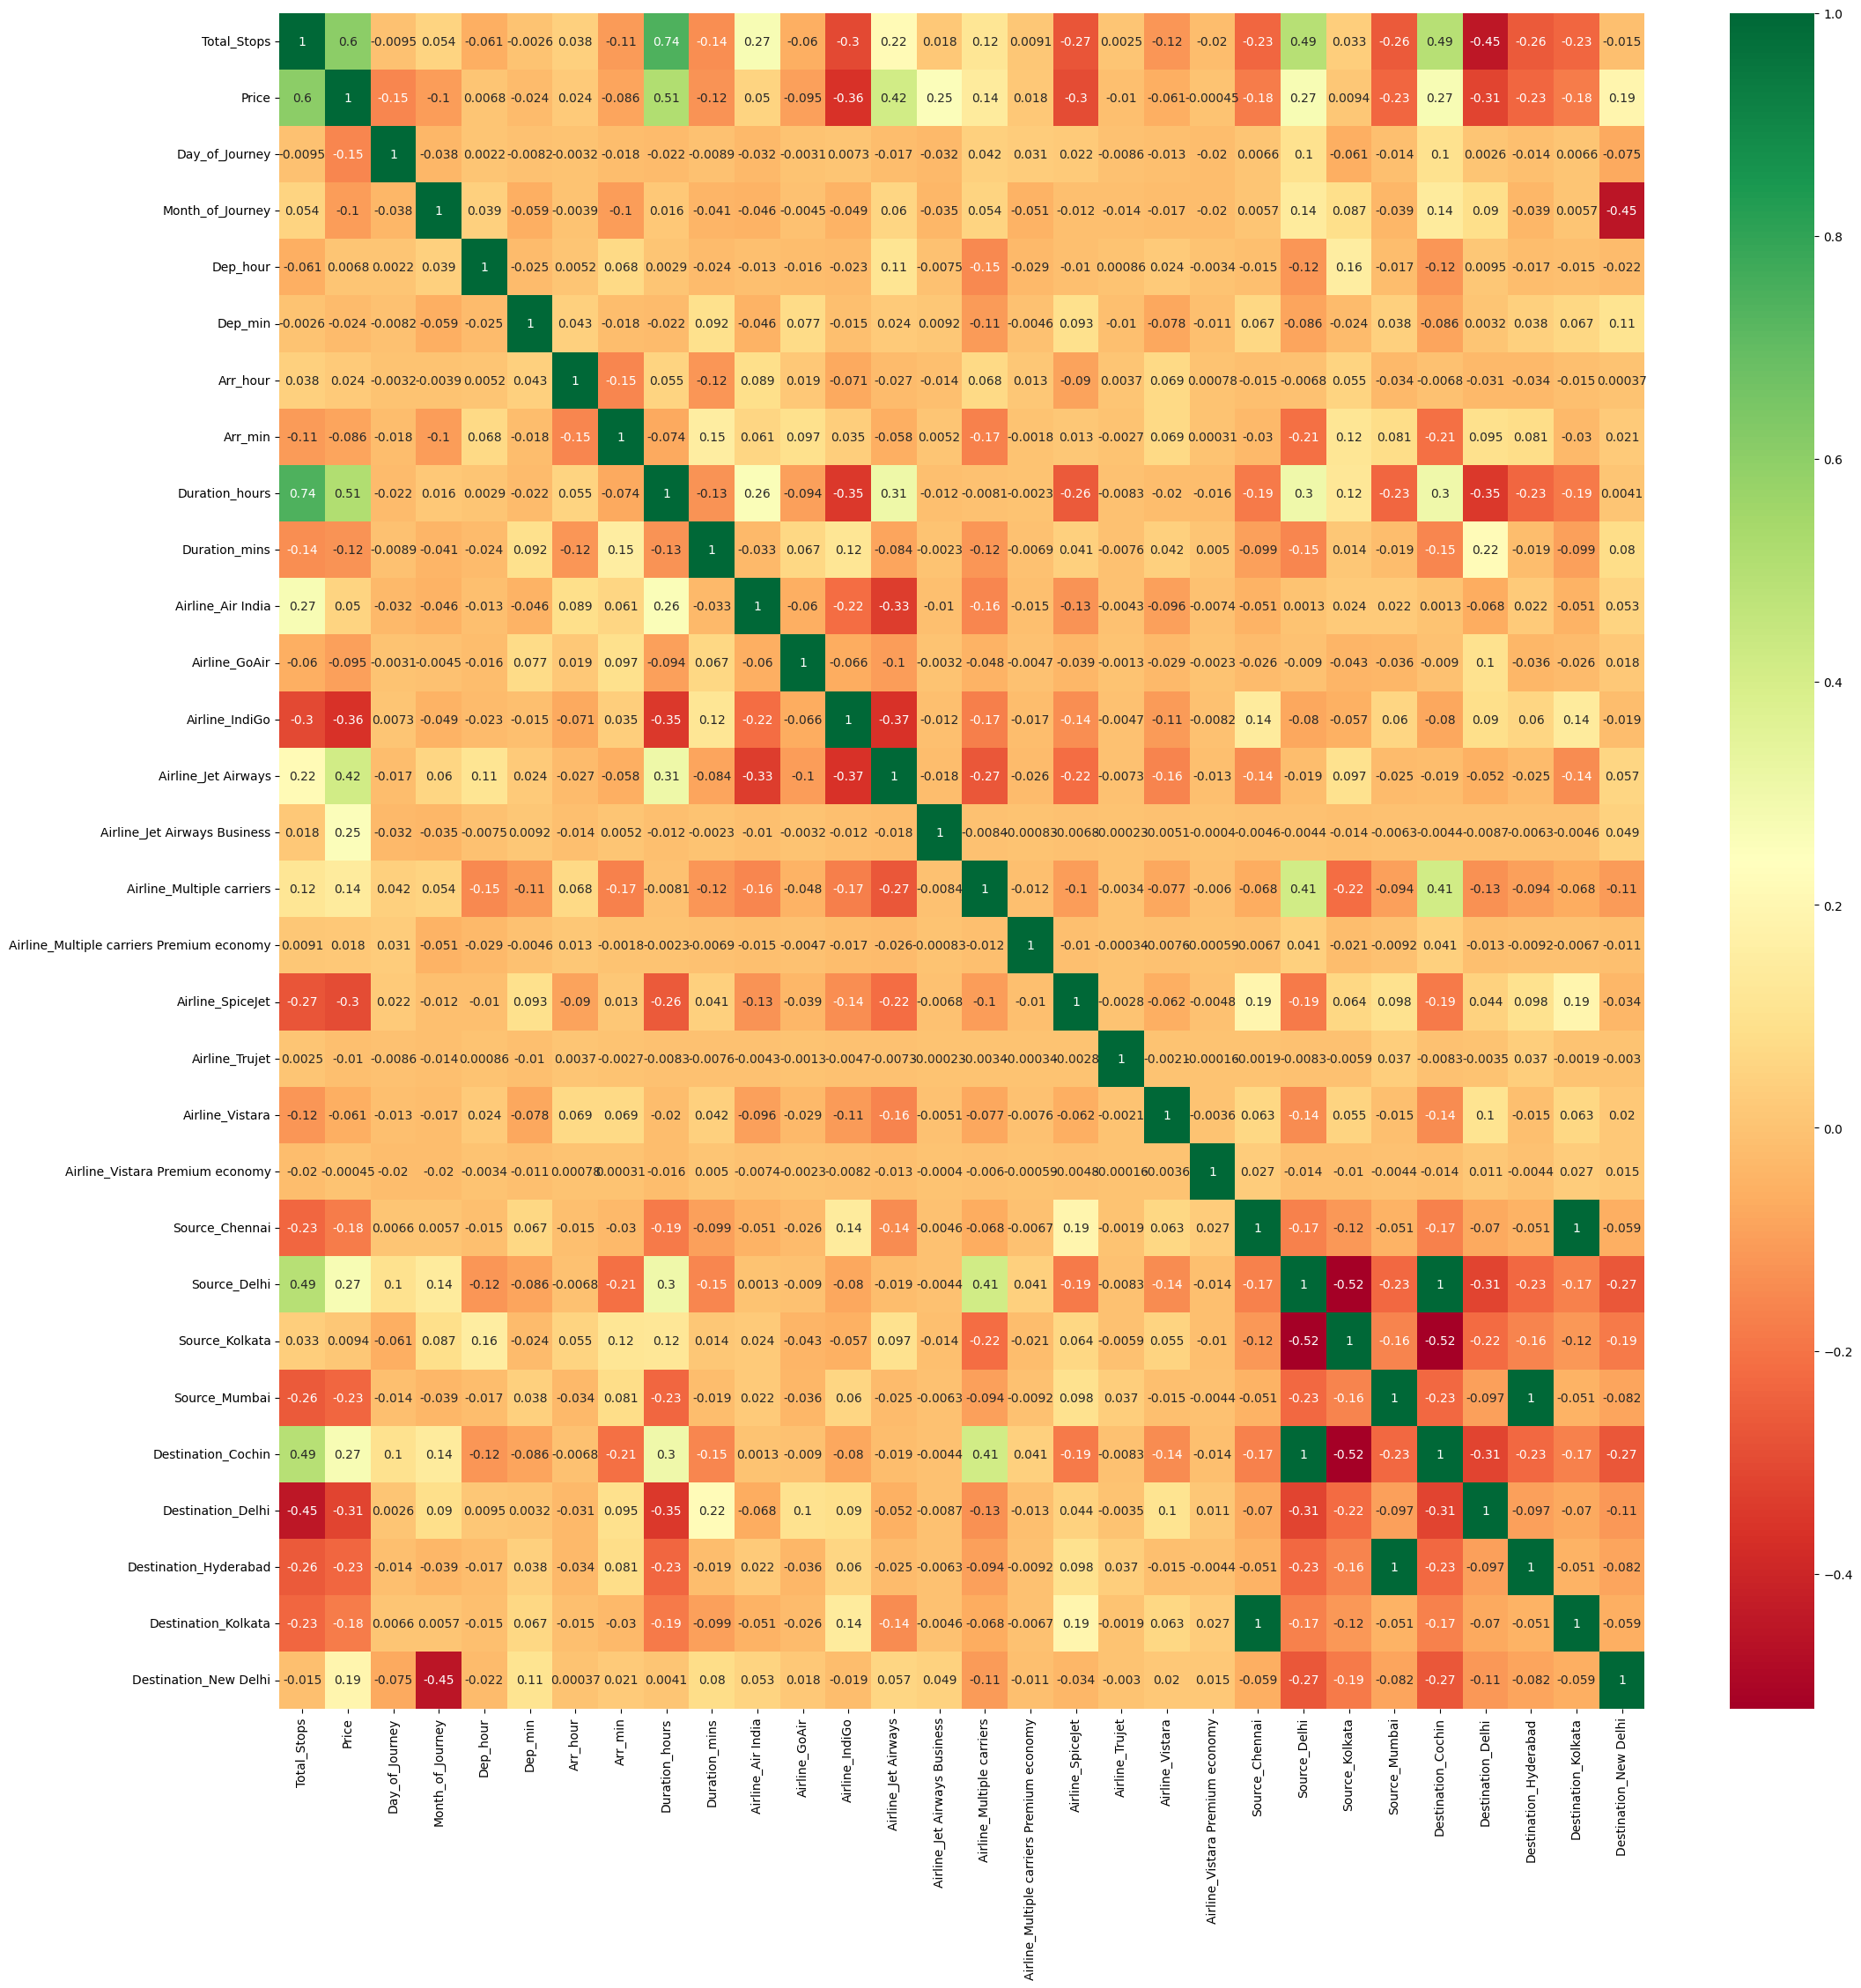

In [57]:
plt.figure(figsize=(25,25))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [59]:
print(selection.feature_importances_)

[2.37429461e-01 1.44112293e-01 5.36085368e-02 2.48110945e-02
 2.16286554e-02 2.80001194e-02 1.93022850e-02 1.10642276e-01
 1.76356957e-02 9.11275266e-03 1.76943455e-03 1.97111117e-02
 1.38039677e-01 6.72135212e-02 1.72409049e-02 8.59710053e-04
 2.96110515e-03 1.32159013e-04 4.93338590e-03 8.14970363e-05
 5.62437538e-04 9.65355830e-03 3.29441952e-03 7.68441837e-03
 1.11908212e-02 1.74196669e-02 5.92073286e-03 4.77581907e-04
 2.45706866e-02]


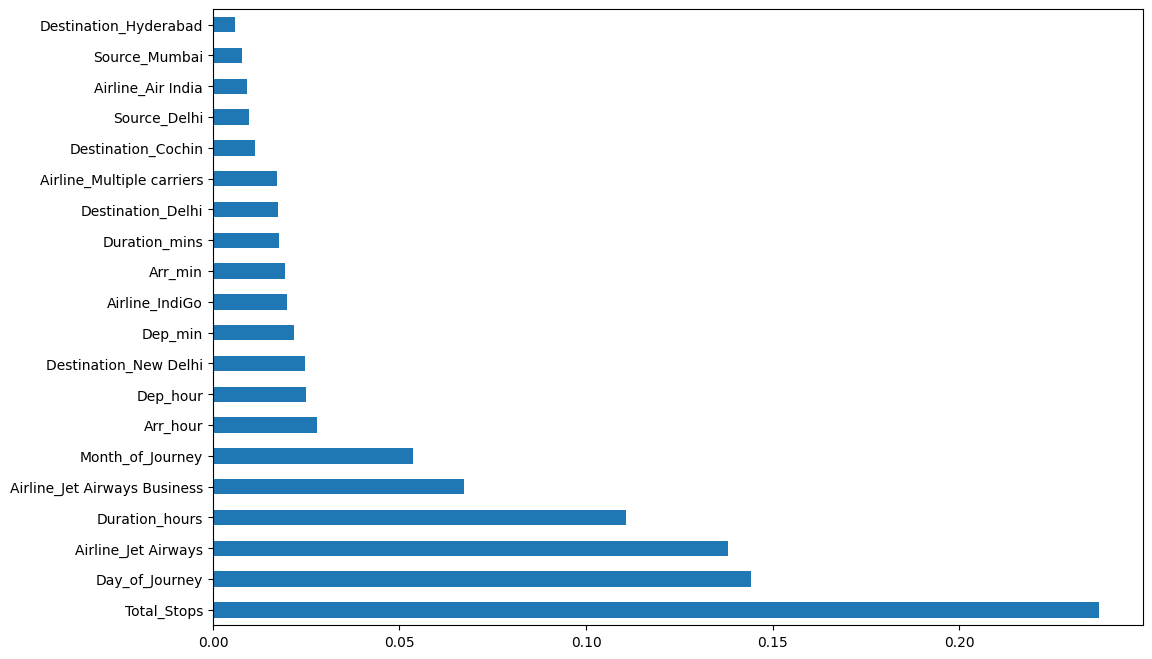

In [60]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

## Fitting model using Random Forest 

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
rf.score(X_train,y_train)

0.9530462739909118

In [64]:
rf_pred=rf.predict(X_test)

In [65]:
rf.score(X_test,y_test)

0.7951290078950273

C:\Users\AGS\.conda\envs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

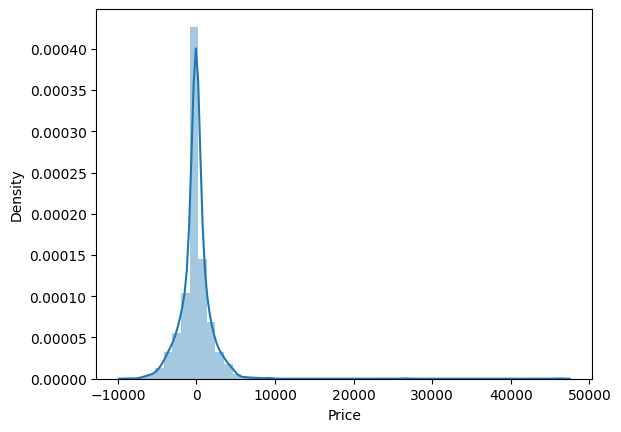

In [66]:
sns.distplot(y_test-rf_pred)

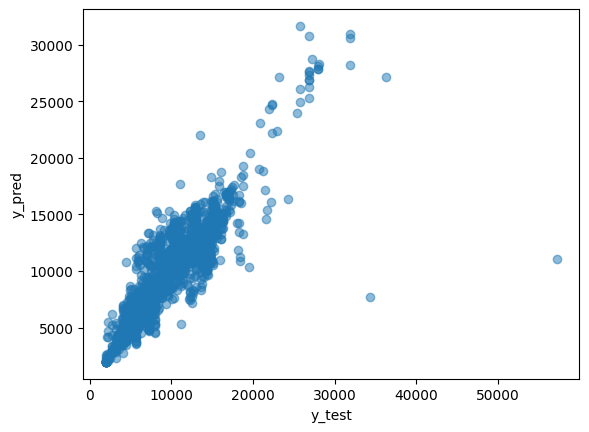

In [67]:
plt.scatter(y_test,rf_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
import math

In [69]:
print("MSE: ",mean_squared_error(y_test,rf_pred))
print("MAE: ",mean_absolute_error(y_test,rf_pred))
print("MAPE: ",mean_absolute_percentage_error(y_test,rf_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,rf_pred)))

MSE:  4417439.870954327
MAE:  1180.3560503722867
MAPE:  0.1301034792929785
RMSE:  2101.7706513685853


In [70]:
r2_score(y_test,rf_pred)

0.7951290078950273

## Performing Hyper parameter tuning on Random Forest Regressor

In [71]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [72]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [73]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [74]:
rf=RandomForestRegressor()

In [75]:
rf=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_root_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [76]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\AGS\.conda\envs\Python\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [77]:
rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [78]:
predictions_RF=rf.predict(X_test)

C:\Users\AGS\.conda\envs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


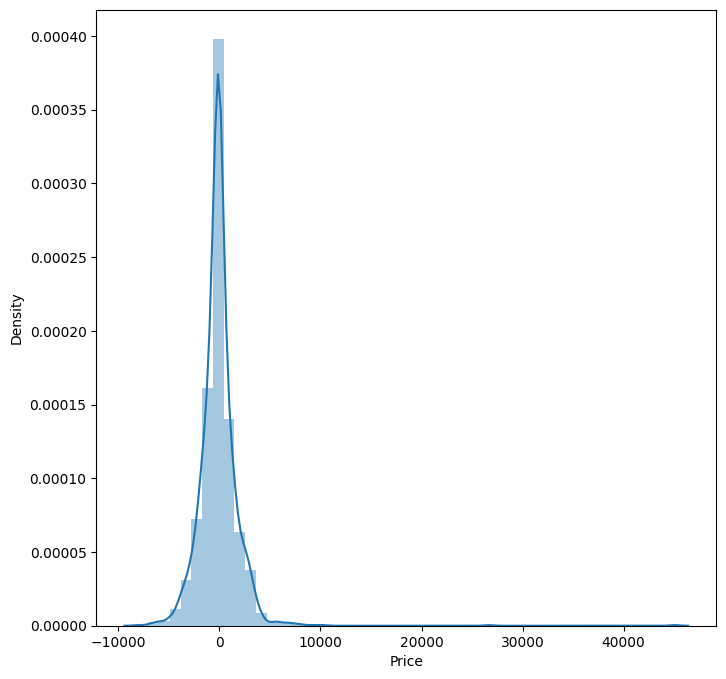

In [79]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-predictions_RF)
plt.show()

In [80]:
print("MSE: ",mean_squared_error(y_test,predictions_RF))
print("MAE: ",mean_absolute_error(y_test,predictions_RF))
print("MAPE: ",mean_absolute_percentage_error(y_test,predictions_RF))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,predictions_RF)))

MSE:  4042560.4584551253
MAE:  1164.1144164352902
MAPE:  0.129553771154608
RMSE:  2010.61196118374


In [81]:
rf.score(X_train,y_train)

-1482.926685859339

In [82]:
rf.score(X_test,y_test)

-2010.61196118374

## Fitted using XGBoost Regressor 

In [83]:
import xgboost as xgb

In [84]:
xg=xgb.XGBRegressor(eval_metric="rmse")

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid={"max_depth":[int(x) for x in np.linspace(5,30, num=6)],
           "n_estimators":[int(x) for x in np.linspace(100,1200,num=12)],
           "learning_rate": [0.1,0.01,0.015]}

In [87]:
xg_grid=RandomizedSearchCV(xg,param_distributions=param_grid,n_jobs=-1,verbose=4,cv=5)

In [88]:
xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse', gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.015],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=4)

In [89]:
xg_grid.best_params_

{'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.015}

In [90]:
xg_grid.best_score_

0.8278747982950666

In [91]:
y_pred_xg=xg_grid.predict(X_test)

In [92]:
xg_grid.score(X_train,y_train)

0.940733529498263

In [93]:
xg_grid.score(X_test,y_test)

0.8196829277166084

C:\Users\AGS\.conda\envs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


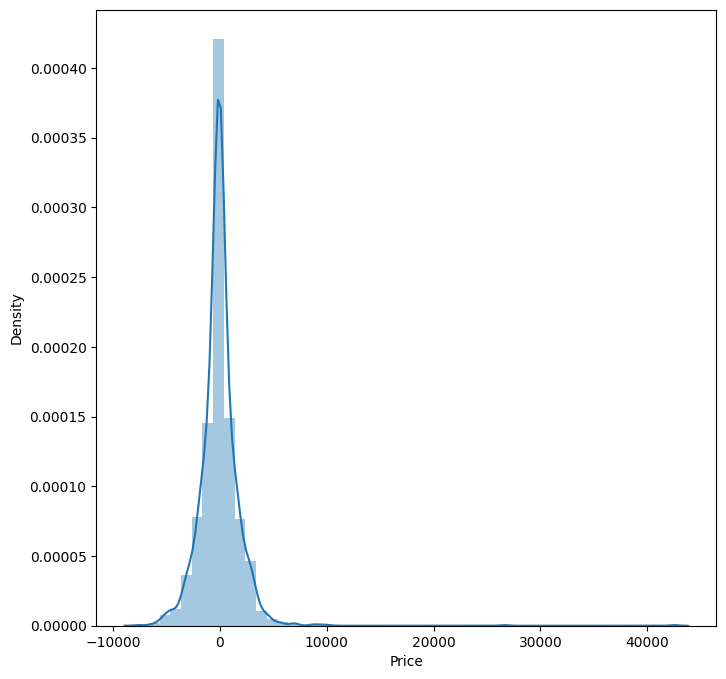

In [94]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-y_pred_xg)
plt.show()

In [95]:
print("MSE: ",mean_squared_error(y_test,y_pred_xg))
print("MAE: ",mean_absolute_error(y_test,y_pred_xg))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred_xg))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred_xg)))

MSE:  3888006.8687824407
MAE:  1151.297599481878
MAPE:  0.1273612748631898
RMSE:  1971.802948771109


## save model

In [96]:
import pickle
from sklearn import metrics

file=open("flight_xgb.pkl","wb")

pickle.dump(xg_grid,file)

In [98]:
pwd

'D:\\Machine Learning\\Flight Predictions'

In [99]:
model=open("flight_xgb.pkl","rb")
xg=pickle.load(model)

EOFError: Ran out of input

In [100]:
y_prediction=xg.predict(X_test)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
metrics.r2_score(y_test,y_prediction)